https://towardsdatascience.com/identify-your-datas-distribution-d76062fc0802   
https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python?lq=1   

## Fit 12 Distributions to each histogram & find best fit

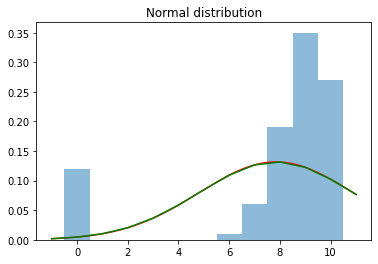

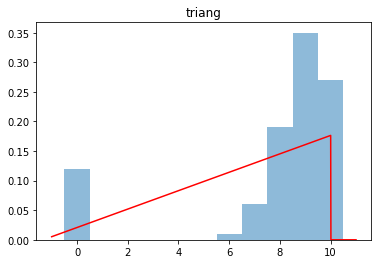

8.434819813986423e+20
0.12336687708121469
15845925.541288832
8.459406447919561e+24
0.1451533393010775
0.1596
0.13163786339043534
0.2143007940544443
6.426213426935476e+32


C:\Users\klein\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


684194455.8996723
0.09727251987536721
27.736135713876074


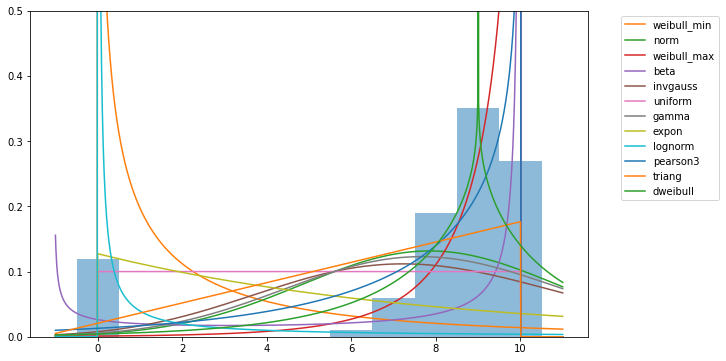

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats
from pylab import plot,show,hist,figure,title


# Histogram data for 10 bees, assuming N=100 experiments
data = np.repeat(np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]), 
                [12,0,0,0,0,0,1,6,19,35,27])
# bins central from 0 to 10
y, x = np.histogram(data, bins=np.linspace(-0.5,10.5,12), density=True)


## 1 Example: normal distribution
# fit parameters
p = scipy.stats.norm.fit(data)
x = np.linspace(-1,11,1201)
x2 = np.linspace(-1,11,13)
pdf_fitted = scipy.stats.norm.pdf(x,loc=p[0],scale=p[1])
pdf_fitted2 = scipy.stats.norm.pdf(x2,loc=p[0],scale=p[1])
title('Normal distribution')
plot(x,pdf_fitted,'r-')
plot(x2,pdf_fitted2,'g-')
weights = np.ones_like(data)/float(len(data))
hist((data),weights=weights,bins=np.linspace(-0.5,10.5,12),alpha=.5)
show()


## 1 Example: normal distribution
# fit parameters
p = scipy.stats.triang.fit(data)
arg = p[:-2]
loc = p[-2]
scale = p[-1]
pdf_fitted = scipy.stats.triang.pdf(x, *arg, loc=loc, scale=scale)
title('triang')
plot(x,pdf_fitted,'r-')
weights = np.ones_like(data)/float(len(data))
hist((data),weights=weights,bins=np.linspace(-0.5,10.5,12),alpha=.5)
show()



# Define distributions 
dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang','dweibull']


plt.figure(figsize=(10,6))
hist((data),weights=weights,bins=np.linspace(-0.5,10.5,12),alpha=.5)
# loop through candidate distributions
for dist_name in dist_names:
    # set up distribution and fit parameters
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(data)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale)
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale) 
    sse = np.sum(np.power(y - pdf_fitted[np.linspace(100,1100,11).astype(int)], 2.0))
    print(sse)
    plt.plot(x,pdf_fitted,label=dist_name)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim([0,0.5])
plt.show()

1 weibull_max  (0.7496840729943548, 10.000000000000002, 0.9040760014481032)   
2 pearson3   (-2.4303804447238404, 7.082472513300745, 3.5453508753090826)   
3 norm   (7.85, 3.0310889132455348)   
4 gamma    (231.03324808959803, -41.57932735983664, 0.21400359730044127)   
5 invgauss (0.011711339131483658, -25.606428181450525, 2852.51202763747)    

Unterschiedliche Ergebnisse mit unterschiedlichen x: Die Werte werden nur da evaluiert, wo ich x angebe, d.h. bei den weniger Werten von oben ist die Kurve anders, aber Schnittpunkte sind alle gleich


Frage: Wie distribution aus mehreren Histogrammen fitten?

0.31299427492328014
0.20816778220006166
0.2596885895413638
0.2629986827403729
0.31779861184055586
0.3698
0.21151550105824868
0.3367326368599095
0.30777548811783684


C:\Users\klein\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\klein\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


0.25994834721501214
0.2636694672791153
0.1717530053059297


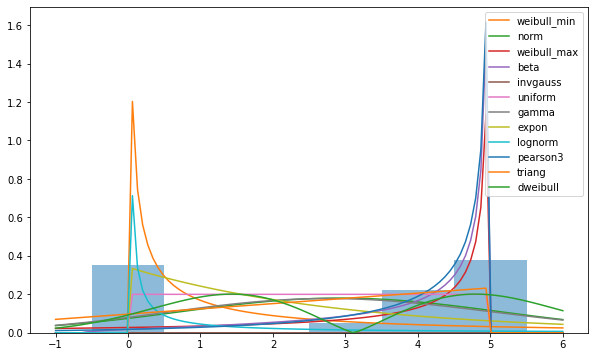

In [19]:
data = np.repeat(np.array([[0],[1],[2],[3],[4],[5]]), 
                [35,0,0,5,22,38])

y, x = np.histogram(data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5], density=True)

x = np.linspace(-1,6,100)
x2 = np.linspace(0.5,5.5,6)
weights = np.ones_like(data)/float(len(data))

dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang','dweibull']

plt.figure(figsize=(10,6))
hist((data),weights=weights,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5],alpha=.5)
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(data)
#    print(params)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale)
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale) 
    sse = np.sum(np.power(y - pdf_fitted[np.round(np.linspace(0,99,8)[1:7]).astype(int)], 2.0))
    print(sse)
    #print(pdf_fitted[95])
    plt.plot(x,pdf_fitted,label=dist_name)
plt.legend(loc='upper right')
plt.show()

1 norm    
2 gamma    
3 weibull_max    
4 pearson3    
5 beta

50.12634096168111
0.22059549808649745
25.558992411748743
0.5520946245765281
0.38738292469584273
0.16877777777777778
60.09862237775542
0.24499922334128976


C:\Users\klein\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\klein\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


5.152400303261759
26.791889041841866
0.24086270932421455
0.07461269768229153


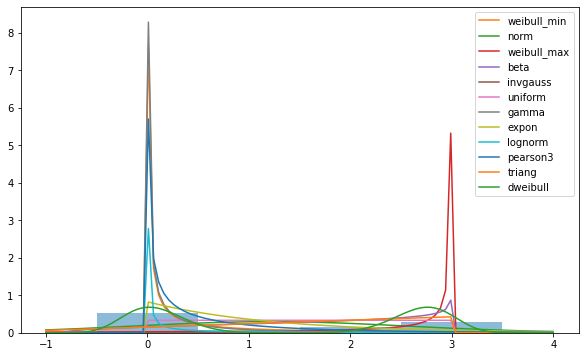

In [20]:
data = np.repeat(np.array([[0],[1],[2],[3]]), 
                [53,2,16,29])
y, x = np.histogram(data, bins=[-0.5,0.5,1.5,2.5,3.5], density=True)

x = np.linspace(-1,4,100)
x2 = np.linspace(0.5,3.5,4)
weights = np.ones_like(data)/float(len(data))

dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang','dweibull']

plt.figure(figsize=(10,6))
hist((data),weights=weights,bins=[-0.5,0.5,1.5,2.5,3.5],alpha=.5)
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(data)
#    print(params)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale)
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale) 
    sse = np.sum(np.power(y - pdf_fitted[np.round(np.linspace(0,99,6)[1:5]).astype(int)], 2.0))
    print(sse)
    #print(pdf_fitted[95])
    plt.plot(x,pdf_fitted,label=dist_name)
plt.legend(loc='upper right')
plt.show()




1 uniform   
2 norm   
3 triang   
4 expon   
5 invgauss